## Observations and Insights 

In [230]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [231]:
# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

249

In [232]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

array(['g989'], dtype=object)

In [233]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [234]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [235]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [236]:
# Generate a summary statistics table of mean, median, 
    #variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method is the most straightforward, 
    #creating multiple series and putting them all together at the end.

In [237]:
# Create a summary table
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_table1 = pd.DataFrame({"Average Tumor Volume (mm3)": means,
                               "Median Tumor Volume (mm3)": medians,
                               "Std. Dev. Tumor Volume (mm3)": std,
                               "Sem Tumor Volume (mm3)": sem,
                               "Variance Tumor Volume (mm3)": variance})
summary_table1

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),Sem Tumor Volume (mm3),Variance Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [238]:
# Generate a summary statistics table of mean, 
    #median, variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [239]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [240]:
drug_list = summary_table1.index.tolist()
# drugs = []
# # drug_list = []
# for drug in range(len(drug_list)):
#     #drugs = drug_list[drug]
#     drugs = drugs.append(drug_list[drug])
#     print(drugs)

In [241]:
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [242]:
# Start with 'Capomulin'
drug_name = ""
for x in range(len(drug_list)):
    drug_name = drug_list[x]
    print(drug_name)

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol


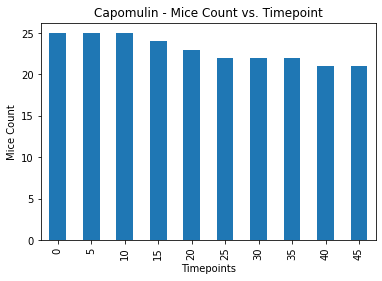

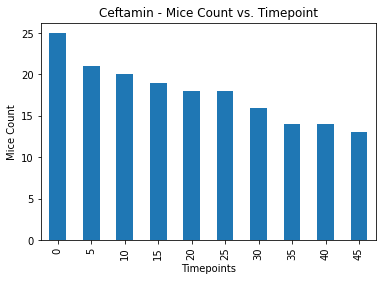

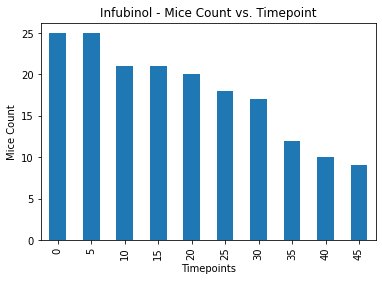

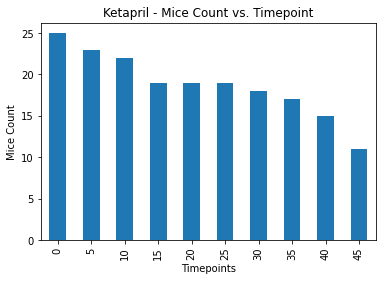

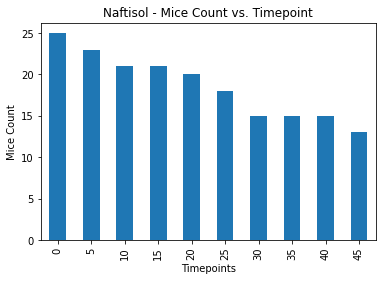

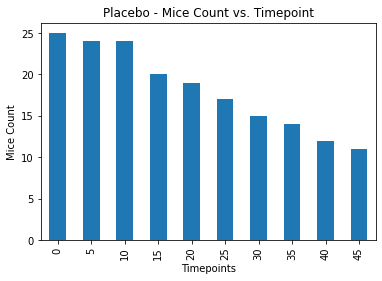

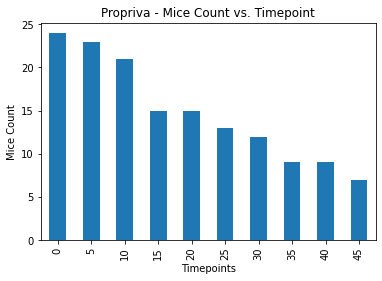

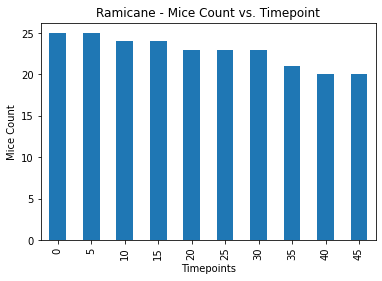

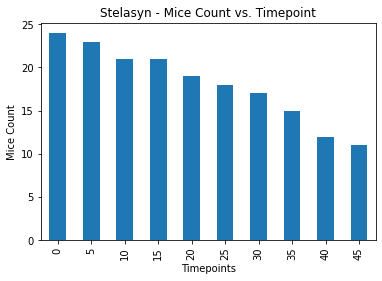

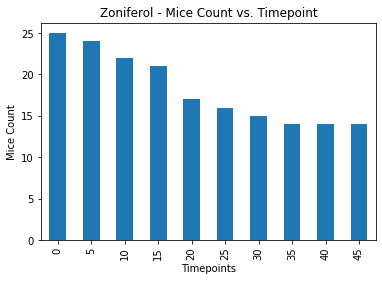

In [243]:
for x in range(len(drug_list)):
    drug_name = drug_list[x]
    drug_list[x] = clean_df.loc[clean_df["Drug Regimen"] == drug_list[x]]
#     drug_for_plot = drug_list[drug]
#     print('===druglist============')
#     print(f"+++++drug_for_plot+++{drug_for_plot}")
#     print('===druglistend============')
    
    plot_title = f"{drug_name} - Mice Count vs. Timepoint"
    drug_list[x] = drug_list[x][["Mouse ID", "Timepoint"]]
    drug_list[x] = drug_list[x].groupby('Timepoint')
#     drug_list[drug] 
    mouse_id = drug_list[x]['Mouse ID'].count()
#     mouse_id
    timepoint_barchart = mouse_id.plot(kind='bar', title=plot_title)
    timepoint_barchart.set_xlabel("Timepoints")
    timepoint_barchart.set_ylabel("Mice Count")
    #print(drug_list[x])
    plt.show()

In [244]:
# Same plots using plt.bar
x_axis = [value for value in range(0, 50, 5)]

In [245]:
# Start with 'Capomulin'
drug_list_plt = summary_table1.index.tolist()
drug_name_plt = ""
for x in range(len(drug_list_plt)):
    drug_name_plt = drug_list_plt[x]
    print(drug_name_plt)

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol


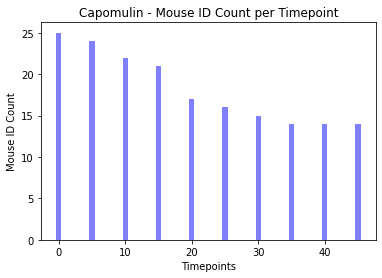

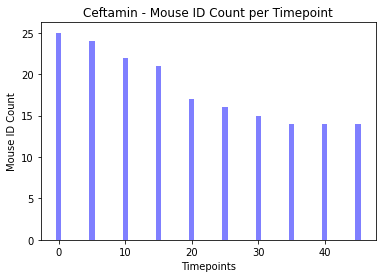

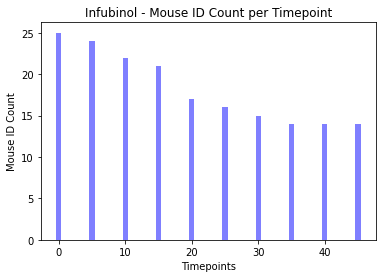

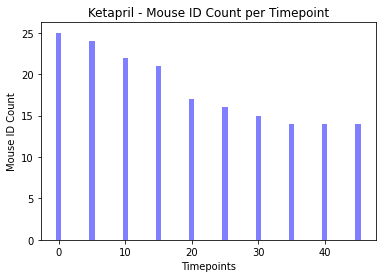

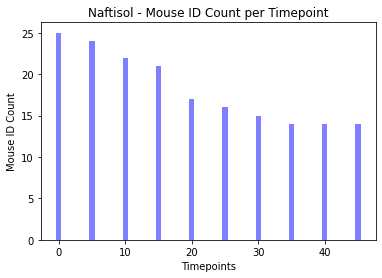

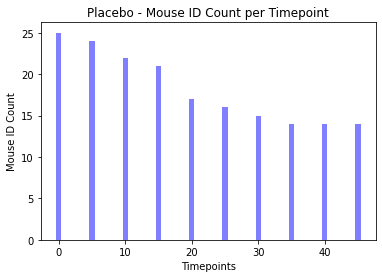

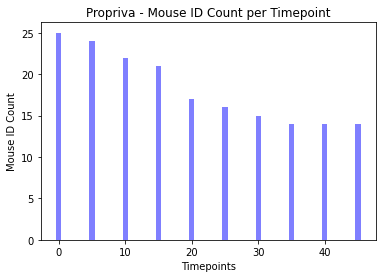

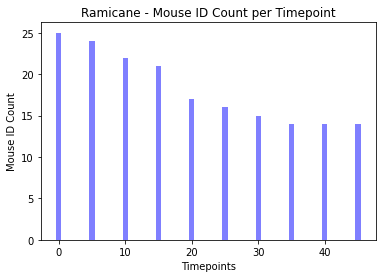

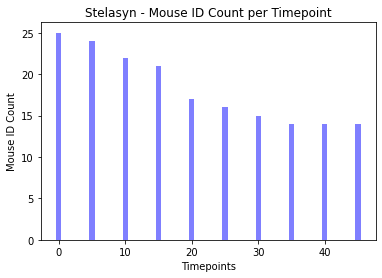

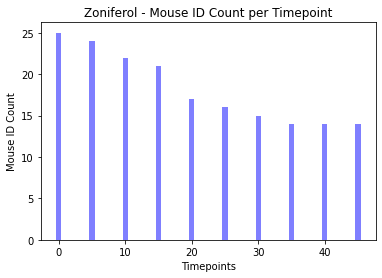

In [246]:
drug_list_plt = summary_table1.index.tolist()
drug_name_plt = ""
for x in range(len(drug_list)):
    drug_name_plt = drug_list_plt[x]
    #print(drug_name_plt)
    plt.bar(x_axis, mouse_id, color='b', alpha=0.5, align="center")
    #plt.xticks(value for value in range(0, 50, 5))
    plt.title(f"{drug_name_plt} - Mouse ID Count per Timepoint")
    plt.xlabel("Timepoints")
    plt.ylabel("Mouse ID Count")
    plt.savefig(f"{drug_name_plt}_MouseID_Count_per_Timepoint")
    plt.show()

In [247]:
# if have more time - Try to merge the plots above into one plot:

In [248]:
# Option 3 - aggregate the plots into one:
# Create a grouped_df with two columns:
grouped_gf = clean_df.groupby(['Timepoint','Drug Regimen'])
mice_count = grouped_gf['Timepoint'].count()
mice_count

Timepoint  Drug Regimen
0          Capomulin       25
           Ceftamin        25
           Infubinol       25
           Ketapril        25
           Naftisol        25
                           ..
45         Placebo         11
           Propriva         7
           Ramicane        20
           Stelasyn        11
           Zoniferol       14
Name: Timepoint, Length: 100, dtype: int64

In [249]:
agg_df = clean_df.groupby(['Drug Regimen','Timepoint']).agg({'Mouse ID':'count'})
#csv.to_excel("agg_df.csv")
print(agg_df)

                        Mouse ID
Drug Regimen Timepoint          
Capomulin    0                25
             5                25
             10               25
             15               24
             20               23
...                          ...
Zoniferol    25               16
             30               15
             35               14
             40               14
             45               14

[100 rows x 1 columns]


In [250]:
# This dictionary is to color the bars in the custom plot based on specific drug.
values = ["royalblue","darkorange","green","red","sandybrown","fuchsia","pink","cornflowerblue","peru","lightseagreen"]
keys = drug_list_plt
color_drug_dict = dict(zip(keys, values))
print(color_drug_dict)

{'Capomulin': 'royalblue', 'Ceftamin': 'darkorange', 'Infubinol': 'green', 'Ketapril': 'red', 'Naftisol': 'sandybrown', 'Placebo': 'fuchsia', 'Propriva': 'pink', 'Ramicane': 'cornflowerblue', 'Stelasyn': 'peru', 'Zoniferol': 'lightseagreen'}


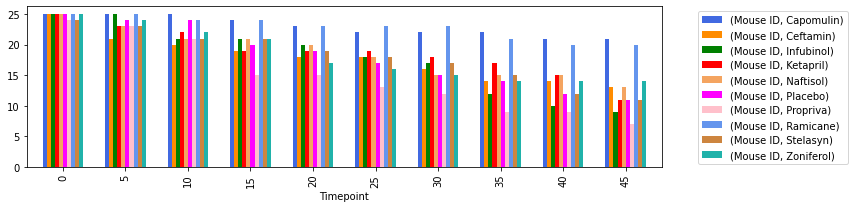

<Figure size 432x288 with 0 Axes>

In [251]:
#colors_drug_dict = pd.dict({})
agg_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', color=values, width=0.65) 
#import pylab as pl
#l = pl.legend((drug_list_plt), loc='best')

#bar, = agg_df.plot(drug_list_plt, label='Inline label')
#agg_df.legend()
#labels = [value for value in range(0, 50, 5)]
#plt.xticks(x_axis, labels, rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
plt.savefig("agg_df_plot")

In [252]:
# Practicing getting a custom plot based on the user input of the Drug Regimen:
drug_user_input = input("What Drug Regimen would you like to look up?")

What Drug Regimen would you like to look up?Naftisol


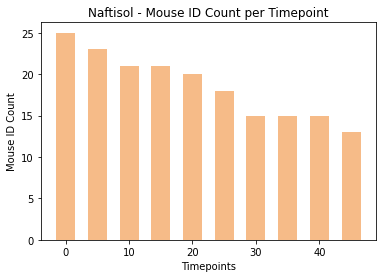

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


In [253]:
#input_drug_plot = 
#print(drug_list_plt)
for x in range(len(drug_list_plt)):
    if drug_user_input == drug_list_plt[x]:
#         print(f"Drug match found: {drug_user_input}")
        x_axis = [value for value in range(0, 50, 5)]
        mouse_id = drug_list[x]['Mouse ID'].count()
        
        color = color_drug_dict.get(drug_list_plt[x], "")
        print()
#         print(f"Mouse_ID from User input{mouse_id}")
#         mouse_id = drug_user_input['Mouse ID'].count()
        plt.bar(x_axis, mouse_id, color=color, width=3, alpha=.75, align="center")
#         plt.xticks(value for value in range(0, 50, 5))
        plt.title(f"{drug_user_input} - Mouse ID Count per Timepoint")
        plt.xlabel("Timepoints")
        plt.ylabel("Mouse ID Count")
        # plt.annotate(str(s[i]), xy=(n[i],s[i]))
#         plt.savefig(f"{drug_name_plt_input}_MouseID_Count_per_Timepoint")
        plt.show()
        break
#     print(f"Drug {drug_user_input} not found.")
print(x_axis)

In [254]:
# labels = ["%d" % i for i in x_axis]
# ax.set_xticklabels(x_labels)

In [255]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [257]:
gender_df = clean_df.groupby("Sex")
gender_df.count()
gender_mice_filtered = gender_df["Sex"]
gender_mice_filtered.count()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

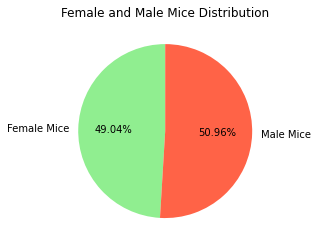

In [258]:
labels = ["Female Mice", "Male Mice"]
sizes = [gender_mice_filtered.count()]
colors = ['lightgreen', 'tomato']
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90, colors=colors)
plt.title("Female and Male Mice Distribution")
plt.savefig("Female and Male Mice Distribution")
plt.show()

In [266]:
# Plot Mice Sex distribution using PyPlot.plot() method:
#gender_df_plot_pie = clean_df[['Mouse ID','Sex']]
#sizes = [gender_mice_filtered.count()]
#print(sizes)
# gender_df_plot_pie = pd.DataFrame({'Sex': ['Female', 'Male'],
#                                    'Mouse ID Count': sizes})
# plot = gender_df_plot_pie.plot.pie()
#gender_df_plot_pie.plot(kind='pie', subplot=False)
#plot = gender_df_plot_pie.plot(kind='pie') # subplot=True
#plt.show()
#gender_df_plot_pie_plot = gender_df_plot_pie.plot.pie(y=gender_df_plot_pie['Sex'].count(), figsize=(5, 5))

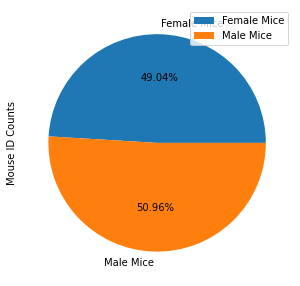

In [277]:
# Plot Mice Sex distribution using PyPlot.plot() method:
df = pd.DataFrame({'Sex': ['Female', 'Male'],
                   'Mouse ID Counts': [922, 958]},
                   index=['Female Mice', 'Male Mice'])
plt = df.plot.pie(y='Mouse ID Counts', figsize=(5,5), startangle=0, autopct="%.2f%%")
plt.legend()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
